In [1]:
result = -25
low = 1
high = abs(result)
ans = (low+high)/2
episloon = 0.01
while abs(ans**2-abs(result)) > episloon:
    if ans**2 > abs(result):
        high = ans
    else:
        low = ans
    ans = (low+high)/2
print(-ans)

-4.9990234375


0.1 approximation problem

In [2]:
epsilon = 0.01
k = 24.0
guess = k
calnum = 0
while abs(guess**2-k) > epsilon:
    calnum += 1
    guess = guess - ((guess**2)-k)/(2*guess)
    print(str(calnum)+': '+  str(guess))

1: 12.5
2: 7.21
3: 5.2693550624133145
4: 4.911996075481052
5: 4.898996732283414


In [3]:
def isparlin(x):
    def ischar(x):
        letter=''
        for i in x:
            if i in 'abcdefghigklmnopqrsduvwxyz':
                letter = letter + i
        return letter
    def ispal(x):
        if len(x)<1:
            return True
        else:
            return x[0]==x[-1] and ispal(x[1:-1])
    return ispal(ischar(x))
def testisparlin():
    print('abcba')
    print(isparlin('abcba'))

In [4]:
print(isparlin('abcba'))

True


In [5]:
def ispal(x):
    l = x[:]
    l.reverse()
    print(l, x)
    if l == x:
        return True
    else:
        return False
def silly(n):
    result = []
    for i in range(n):
        a = input('enter an element:')
        result.append(a)
    print(result)
    if ispal(result):
        print('yes')
    else:
        print('no')

In [6]:
import random
def flipnum(n):
    heads = 0
    for i in range(n):
        if random.random()<0.5:
            heads += 1
    return heads/n
def flipsim(flippertrial, numtrial):
    result = []
    for i in range(numtrial):
        result.append(flipnum(flippertrial))
    mean = sum(result)/numtrial
    return mean

In [7]:
flipsim(100, 100)

0.49759999999999993

In [8]:
import matplotlib.pyplot as plt
def flipPlot(minexp, maxexp):
    ratios = []
    x = []
    diff = []
    for i in range(minexp, maxexp+1):
        x.append(2**i)
    for i in x:
        heads = 0
        for flipnum in range(i):
            if random.random() < 0.5:
                heads += 1
        tails = flipnum - heads
        ratios.append(heads/tails)
        diff.append(abs(heads-tails))
    plt.subplot(1, 2, 1)
  
    plt.semilogx(x, ratios, 'r--')
    plt.subplot(1, 2, 2)
    plt.semilogx(x, diff, 'b--')
    
            

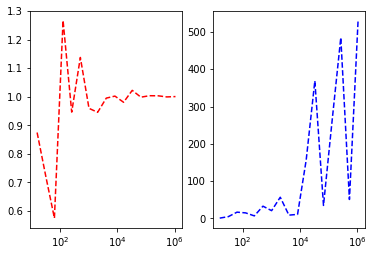

In [9]:
random.seed(0)
flipPlot(4, 20)

(array([ 21.,  68., 103., 125., 182., 170., 156.,  96.,  57.,  24.]),
 array([  1. ,  40.1,  79.2, 118.3, 157.4, 196.5, 235.6, 274.7, 313.8,
        352.9, 392. ]),
 <a list of 10 Patch objects>)

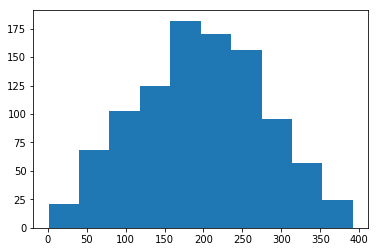

In [10]:
vals = [1, 200]
for i in range(1000):
    num1=random.choice(range(1, 200))
    num2=random.choice(range(1, 200))
    vals.append(num1+num2)
plt.hist(vals, bins=10)

In [11]:
random.gauss(1, 10)

-0.5333648981718748

In [12]:
def rollDies():
    return random.choice([1, 2, 3, 4, 5, 6])
def checkpascal(n):
    corrnum = 0
    for i in range(n):
        for j in range(24):
            d1=rollDies()
            d2=rollDies()
            if d1 == 6 and d2 == 6:
                corrnum += 1
                break
    return corrnum/n
        

In [13]:
checkpascal(2000)

0.4765

In [14]:
class crapgame(object):
    def __init__(self):
        self.passwins, self.passloses = (0, 0)
        self.dpwins, self.dploses, self.pushes = (0, 0, 0)
    def hand(self):
        throw = rollDies() + rollDies()
        if throw == 7 or throw == 11:
            self.passwins += 1
            self.dploses += 1
        elif throw == 2 or throw == 3 or throw == 12:
            self.passloses += 1
            if throw == 12:
                self.pushes += 1
            else:
                self.dploses += 1
        else:
            point = throw
            while True:
                throw = rollDies() + rollDies()
                if throw == point:
                    self.passwins += 1
                    self.dploses += 1
                    break
                elif throw == 7:
                    self.passloses += 1
                    self.dpwins += 1
                    break
    def passresult(self):
        return (self.passwins, self.passloses)
    def dpresult(self):
        return (self.dpwins, self.dploses, self.pushes)
        

In [15]:
import statistics
def crapsim(handnum, gamenum):
    game = []
    for i in range(gamenum):
        c = crapgame()
        for n in range(handnum):
            c.hand()
        game.append(c)
    pROIPergame, dpROIPergame = [], []
    for g in game:
        wins, loses = g.passresult()
        pROIPergame.append((wins - loses)/handnum)
        wins, loses, pushes = g.dpresult()
        dpROIPergame.append((wins - loses)/handnum)
    meanROI = str(round((100*sum(pROIPergame)/gamenum), 4))+'%'
    sigma = str(round((100*statistics.stdev(pROIPergame)/gamenum), 4))+'%'
    print('Pass:', 'MeanROI =', meanROI, 'Std.Dev =', sigma)
    meanROI = str(round((100*sum(dpROIPergame)/gamenum), 4))+'%'
    sigma = str(round((100*statistics.stdev(dpROIPergame)/gamenum), 4))+'%'
    print('Dpass:', 'MeanROI =', meanROI, 'Std.Dev =', sigma)
    

In [16]:
crapsim(100, 5)

Pass: MeanROI = -3.2% Std.Dev = 2.2379%
Dpass: MeanROI = -19.2% Std.Dev = 2.3723%


Knapsack and graph optimization problems

In [51]:
class Item(object):
    def __init__(self, n, v, w):
        self.name = n
        self.value = float(v)
        self.weight = float(w)
    def getName(self):
        return self.name
    def getValue(self):
        return self.value
    def getWeight(self):
        return self.weight
    def __str__(self):
        result = '<' + self.name + ',' + str(self.value)\
                 + ',' + str(self.weight) + '>'
        return result
def value(item):
    return item.getValue()
def weightInverse(item):
    return 1/item.getWeight()
def density(item):
    return item.getValue()/item.getWeight()
def builditems():
    names = ['clock', 'painting', 'radio', 'vase', 'book', 'computer']
    values = [175, 90, 20, 50, 10, 200]
    weights = [10, 9, 4, 2, 1, 20]
    Items = []
    for i in range(len(names)):
        Items.append(Item(names[i], values[i], weights[i]))
    return Items

In [64]:
def greedy(items, maxweight, keyfunction):
    itemscopy = sorted(items, key=keyfunction, reverse=True)
    result = []
    totalvalue = 0.0
    totalweight = 0.0
    for i in range(len(itemscopy)):
        if (totalweight+itemscopy[i].getWeight()) <= maxweight:
            result.append(itemscopy[i])
            totalweight += itemscopy[i].getWeight()
            totalvalue += itemscopy[i].getValue()
    return (result, totalvalue)
def testgreedy(items, constraint, keyfunction):
    taken, val = greedy(items, constraint, keyfunction)
    print('total value of items taken =', val)
    for item in taken:
        print('  ', item)
def testgreedys(maxweight = 20):
    items = builditems()
    print('use greedy by value to fill knapsack of size', maxweight)
    testgreedy(items, maxweight, value)
    print('use greedy by weight to fill knapsack of size', maxweight)
    testgreedy(items, maxweight, weightInverse)
    print('use greedy by density to fill knapsack of size', maxweight)
    testgreedy(items, maxweight, density)
    

In [65]:
testgreedys(maxweight=20)

use greedy by value to fill knapsack of size 20
total value of items taken = 200.0
   <computer,200.0,20.0>
use greedy by weight to fill knapsack of size 20
total value of items taken = 170.0
   <book,10.0,1.0>
   <vase,50.0,2.0>
   <radio,20.0,4.0>
   <painting,90.0,9.0>
use greedy by density to fill knapsack of size 20
total value of items taken = 255.0
   <vase,50.0,2.0>
   <clock,175.0,10.0>
   <book,10.0,1.0>
   <radio,20.0,4.0>


<font size=3>An optimal solution to the 0/1 Knapsack problem</font>